In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('145325-regression.txt', sep='\t')
X = df.drop(columns='class').values
y = df['class'].values
print(X.shape, y.shape)

(435, 77) (435,)


In [4]:
stats = []
for i in range(45):
    stats.append(f'stat{i}')
# df.describe()
print(df["class"].max(), df["class"].min())

3056.0 36.0


In [34]:
df.describe()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,max_el,diff,diffplus,diffminus,std,diff/std**0.2,diff/std**0.6,diff/std**1,diff/std**1.4,diff/std**2,maxmiddle,similarwindow_4.0,similarwindow_4.1,similarwindow_4.2,similarwindow_4.3,stat0,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,stat10,stat11,stat12,stat13,stat14,stat15,stat16,stat17,stat18,stat19,stat20,stat21,stat22,stat23,stat24,stat25,stat26,stat27,stat28,stat29,stat30,stat31,stat32,stat33,stat34,stat35,stat36,stat37,stat38,stat39,stat40,stat41,stat42,stat43,stat44,class
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.012071,0.109289,0.142156,0.179829,0.203741,0.224319,0.249344,0.230200,0.196487,0.138763,0.107960,0.088405,0.023129,0.018671,0.017253,0.013083,0.013431,0.372408,0.198566,0.104049,-0.094517,0.041135,0.232067,0.323599,0.457292,0.623673,0.678410,0.379202,0.129411,0.434111,0.499704,0.553882,0.041448,0.056897,0.077054,0.093116,0.106140,0.119651,0.110110,0.095278,0.066440,0.050667,0.040878,0.008556,0.005665,0.004866,0.003597,0.003473,0.210208,0.282645,0.215351,0.249200,0.009275,0.011835,0.030331,0.051845,0.054813,0.061184,0.074875,0.077286,0.067161,0.064146,0.042622,0.018502,0.009154,0.006293,0.013592,0.007194,0.248285,0.164142,0.235431,0.274832,0.038885,-0.000252,0.030486,0.061849,1.623966,463.533333
std,0.004746,0.082997,0.109574,0.136900,0.141062,0.177564,0.174365,0.154836,0.144835,0.130382,0.123097,0.105501,0.035505,0.019133,0.014910,0.010574,0.013162,0.170337,0.119758,0.067347,0.059340,0.018865,0.121036,0.125278,0.142039,0.189848,0.220142,0.150193,0.068935,0.270354,0.299643,0.345897,0.039817,0.052152,0.068888,0.071401,0.089320,0.088302,0.078279,0.074736,0.066437,0.062991,0.053834,0.017649,0.008576,0.005815,0.003862,0.003834,0.072034,0.043475,0.067056,0.042240,0.097719,0.101696,0.096998,0.091100,0.090654,0.088119,0.082600,0.077682,0.087468,0.088578,0.097060,0.099305,0.100609,0.104602,0.099508,0.101447,0.149287,0.141999,0.135555,0.167602,0.073842,0.057400,0.065525,0.125322,0.308698,302.696544
min,0.003210,0.011637,0.008696,0.011622,0.014795,0.009602,0.005476,0.004196,0.004559,0.002747,0.004130,0.002131,0.002591,0.003698,0.001737,0.001315,0.000489,0.069914,0.016338,0.006037,-0.454650,0.012151,0.024844,0.052724,0.066248,0.081088,0.092363,0.093750,0.022492,0.029998,0.084661,0.066971,0.001338,0.000930,0.000545,0.001434,0.001896,0.000880,0.001535,0.000461,0.000084,0.000115,0.000196,0.000091,0.000196,0.000194,0.000112,0.000048,0.030278,0.116170,0.032179,0.091880,-0.141380,-0.141420,-0.141330,-0.141420,-0.141420,-0.141370,-0.141360,-0.141420,-0.141270,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141420,-0.141390,-0.122220,-0.128840,-0.090919,-0.076879,-0.056060,-0.061345,-0.059685,-0.052316,0.681610,36.000000
25%,0.008459,0.057215,0.077655,0.092656,0.093899,0.091210,0.110365,0.119150,0.063751,0.025701,0.020035,0.016688,0.007481,0.009275,0.008917,0.006214,0.005896,0.239725,0.106085,0.052243,-0.124595,0.027357,0.137160,0.225185,0.353350,0.484970,0.513880,0.273440,0.076386,0.241090,0.297805,0.318035,0.016918,0.023836,0.030250,0.036864,0.040435,0.051964,0.051994,0.027042,0.010394,0.007850,0.005136,0.001834,0.002000,0.0

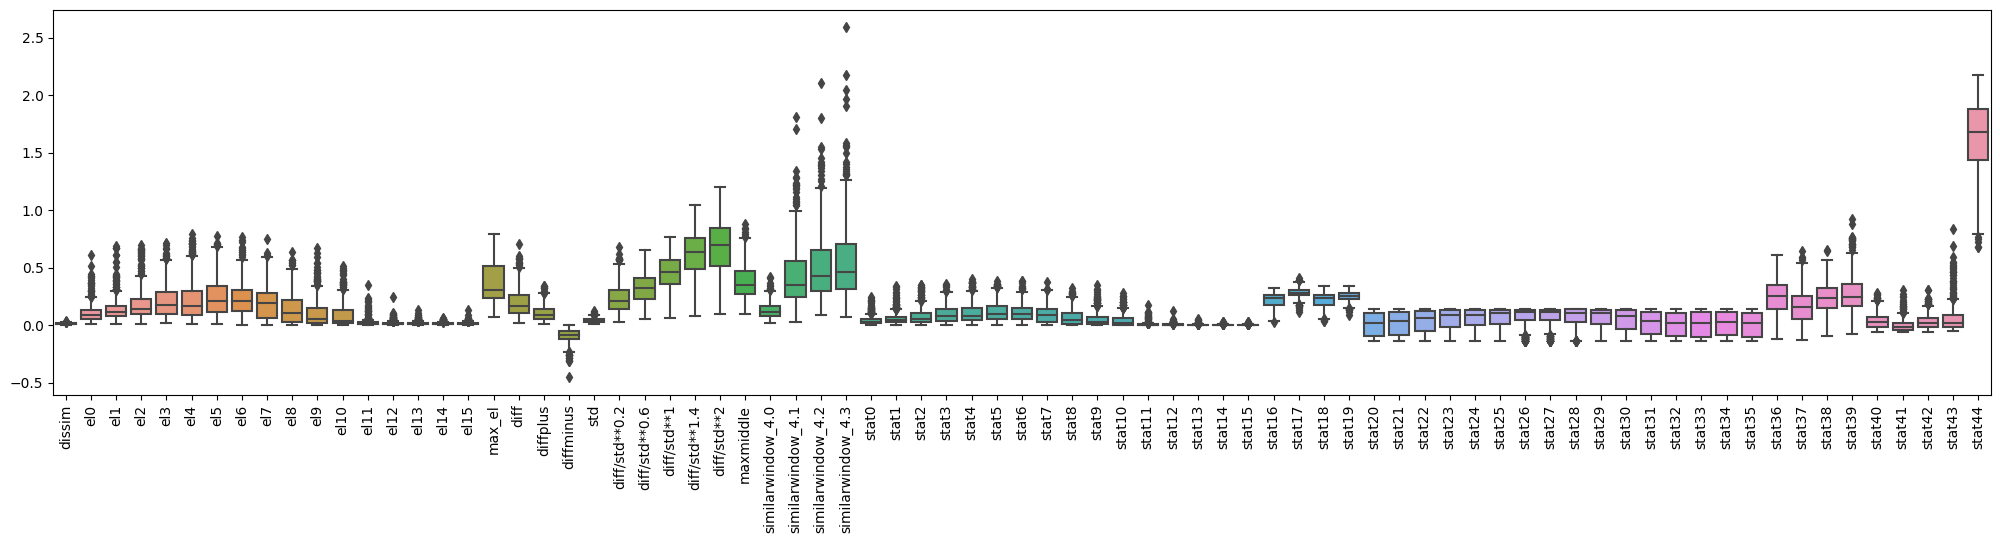

In [6]:
plt.subplots(figsize=(25, 5))
sns.boxplot(data=df.drop(columns='class'))
plt.xticks(rotation=90)
plt.show()